In [1]:
import pandas as pd
import numpy as np
import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
svr_name = 'KU1ICDDWV011.kunet.ae'
db_name = 'CACM'
u_name = 'cacm_user'
u_pass = 'Welcome#123'

In [3]:
eng = create_engine("mssql+pyodbc://"+u_name+":"+u_pass+"@"+svr_name+"/"+db_name+"?driver=ODBC+Driver+17+for+SQL+Server")

In [4]:
query_payroll = "select * from ADERP.dbo.XXDOF_BI_KU_PAYROLL_T"

In [5]:
payroll = pd.read_sql(query_payroll, eng)

In [6]:
payroll_2021 = payroll[payroll['PAYYEAR'].isin(['2020','2021'])]

In [7]:
ded_housing = payroll_2021[payroll_2021['ELEMENTNAME'] == 'Ded Housing Advance']

In [8]:
ded_housing = ded_housing[['PAYYEAR','PAYMONTH','EMPLOYEENUMBER','EMPLOYEEGRADE','ELEMENTVALUE']]

In [9]:
ded_housing = ded_housing.astype({'ELEMENTVALUE':'float','PAYYEAR':'int'})

In [10]:
month_dict = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}

In [11]:
ded_housing['MONTH'] = ded_housing['PAYMONTH'].map(month_dict)

In [12]:
ded_housing.pivot_table('ELEMENTVALUE',index='EMPLOYEENUMBER',columns=['PAYYEAR','MONTH'],fill_value=0,margins=True,aggfunc='sum')

PAYYEAR              2020                                              \
MONTH                   1          2          3          4          5   
EMPLOYEENUMBER                                                          
100049465            0.00       0.00       0.00       0.00       0.00   
100050250            0.00       0.00       0.00       0.00       0.00   
100052539            0.00       0.00       0.00   45000.00       0.00   
1860                 0.00       0.00       0.00       0.00       0.00   
1866                 0.00       0.00       0.00       0.00       0.00   
...                   ...        ...        ...        ...        ...   
PI3298               0.00       0.00       0.00       0.00       0.00   
PI3620               0.00       0.00       0.00       0.00       0.00   
PI3723               0.00       0.00       0.00       0.00       0.00   
PI4020               0.00    9666.67    9666.67    9666.67    9666.67   
All             184331.24  460328.54  441108.59  582086.20  612581.68   

PAYYEAR                                                                ...  \
MONTH                   6          7          8          9         10  ...   
EMPLOYEENUMBER                                                         ...   
100049465            0.00       0.00       0.00       0.00       0.00  ...   
100050250            0.00       0.00       0.00       0.00       0.00  ...   
100052539            0.00       0.00       0.00       0.00       0.00  ...   
1860                 0.00       0.00       0.00       0.00       0.00  ...   
1866                 0.00       0.00       0.00       0.00       0.00  ...   
...                   ...        ...        ...        ...        ...  ...   
PI3298               0.00   25000.00   25000.00   25000.00   25000.00  ...   
PI3620               0.00       0.00       0.00       0.00       0.00  ...   
PI3723               0.00       0.00       0.00       0.00       0.00  ...   
PI4020            9666.67    9666.67    9666.67    9666.67    9666.67  ...   
All             729956.66  770468.52  772935.07  823101.74  843095.55  ...   

PAYYEAR              2021                                              \
MONTH                   4          5          6          7          8   
EMPLOYEENUMBER                                                          
100049465            0.00       0.00       0.00       0.00       0.00   
100050250            0.00       0.00       0.00       0.00       0.00   
100052539            0.00       0.00       0.00       0.00       0.00   
1860                 0.00       0.00       0.00       0.00       0.00   
1866                 0.00       0.00       0.00       0.00       0.00   
...                   ...        ...        ...        ...        ...   
PI3298               0.00       0.00       0.00   25000.00   25000.00   
PI3620               0.00       0.00       0.00       0.00       0.00   
PI3723               0.00       0.00    6666.66    3333.33       0.00   
PI4020            9677.00    9677.00    9677.00    9677.00       0.00   
All             390242.64  444492.79  603576.08  720332.21  753217.51   

PAYYEAR                                                               All  
MONTH                   9         10          11          12               
EMPLOYEENUMBER                                                             
100049465            0.00       0.00        0.00        0.00         0.00  
100050250            0.00       0.00        0.00        0.00         0.00  
100052539            0.00       0.00        0.00        0.00     45000.00  
1860                 0.00       0.00        0.00        0.00         0.00  
1866                 0.00       0.00     8333.33     8333.33     16666.66  
...                   ...        ...         ...         ...          ...  
PI3298           25000.00   25000.00    25000.00    25000.00    300000.00  
PI3620               0.00       0.00        0.00        0.00         0.00  
PI3723               0.00

In [17]:
pay = payroll.set_index('PAYYEAR').sort_index()

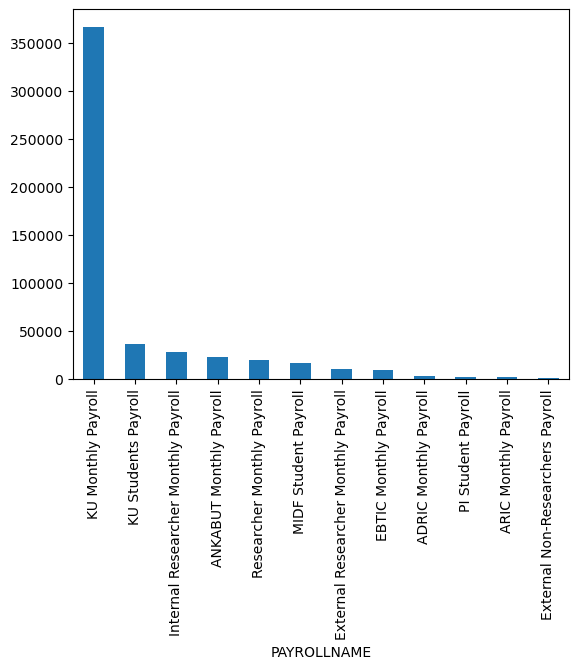

In [19]:
pay.value_counts("PAYROLLNAME").plot(kind='bar')
plt.show()

In [11]:
payroll[payroll['EMPLOYEENUMBER'] == 'KU763']['ELEMENTVALUE']

160080        6050
160081       19267
160082           0
160083         .33
160084    16666.67
            ...   
521204     2248.67
521205     3498.67
521206       26984
521207       15000
521208     2248.67
Name: ELEMENTVALUE, Length: 274, dtype: object